# Testing out how to process dendritic events as a binary series.

In [29]:
import os
import sys
sys.path.append('..') # have to do this for relative imports in jupyter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.cc_serpt import cc_serpt
from src.ser_ss import ser_ss
from src.load_dendevt_csv import load_dendevt_csv
from src.load_spike_h5 import load_spike_h5
from src.permute_pt import permute_pt
from src.seg_dendevt import seg_dendevt
from src.ser_seg_dendevt import ser_seg_dendevt
from src.sta_ap_dendevt import sta_ap_dendevt
from src.bin_serser import bin_serser

In [2]:
# files to pull data from
spk_fname = 'Y:\\DendCompOsc\\16Hzapical_exc_mod\\output_16Hz_dend_inh_0deg_exc_10p\spikes.h5'
ca_fname = 'Y:\\DendCompOsc\\16Hzapical_exc_mod\\output_16Hz_dend_inh_0deg_exc_10p_ca.csv'
na_fname = 'Y:\\DendCompOsc\\16Hzapical_exc_mod\\output_16Hz_dend_inh_0deg_exc_10p_na.csv'
nmda_fname = 'Y:\\DendCompOsc\\16Hzapical_exc_mod\\output_16Hz_dend_inh_0deg_exc_10p_nmda.csv'

In [3]:
# load data
spk_t = load_spike_h5(spk_fname)
ca_t = load_dendevt_csv(ca_fname)
na_t = load_dendevt_csv(na_fname)
nmda_t = load_dendevt_csv(nmda_fname)

C:\Users\dbh60\AppData\Local\Temp/ipykernel_4708/3804444408.py:3: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  ca_t = load_dendevt_csv(ca_fname)
C:\Users\dbh60\AppData\Local\Temp/ipykernel_4708/3804444408.py:4: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  na_t = load_dendevt_csv(na_fname)
C:\Users\dbh60\AppData\Local\Temp/ipykernel_4708/3804444408.py:5: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  nmda_t = load_dendevt_csv(nmda_fname)


In [4]:
# figure out window
print(np.max(nmda_t['nmda_lower_bound']))
samps_per_ms = 10
sim_win = [0, 2000000]
sta_win = [-100, 100]
step = 2 * samps_per_ms

1989593.0


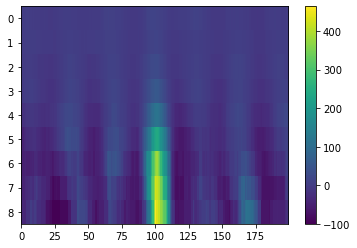

In [6]:
# calcium spike test
ca_seg = seg_dendevt(ca_t)
ca_seg = ser_seg_dendevt(ca_seg, step_len=step, win_lim=[0, 2000000])
ca_seg = sta_ap_dendevt(ca_seg, np.round(spk_t / step), bin=1, win=sta_win)

# plot results
sta_arr = np.vstack(ca_seg['sta'])
fig, ax = plt.subplots()
plt.imshow(sta_arr, interpolation='none')
plt.colorbar()
ax.set_aspect('auto')
#plt.clim(-100,400)
plt.show()


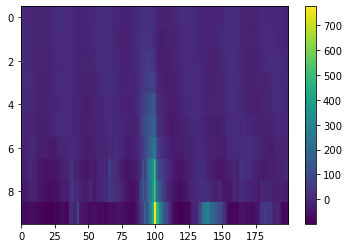

In [32]:
# NMDA spike test
nmda_seg = seg_dendevt(nmda_t)
nmda_seg = ser_seg_dendevt(nmda_seg, step_len=step, win_lim=[0, 2000000])
nmda_seg = sta_ap_dendevt(nmda_seg, np.round(spk_t / step), bin=1, win=sta_win)

# plot results
sta_arr = np.vstack(nmda_seg['sta'])
fig, ax = plt.subplots()
plt.imshow(sta_arr, interpolation='none')
plt.colorbar()
ax.set_aspect('auto')
#plt.clim(-100,400)
plt.show()

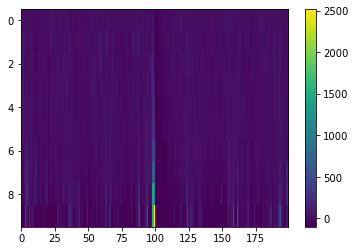

In [7]:
# Na spike test
na_seg = seg_dendevt(na_t)
na_seg = ser_seg_dendevt(na_seg, step_len=step, win_lim=[0, 2000000])
na_seg = sta_ap_dendevt(na_seg, np.round(spk_t / step), bin=1, win=sta_win)

# plot results
sta_arr = np.vstack(na_seg['sta'])
fig, ax = plt.subplots()
plt.imshow(sta_arr, interpolation='none')
plt.colorbar()
ax.set_aspect('auto')
#plt.clim(-100,400)
plt.show()